<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_Monte_Carlo_Integration_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo Methods

Last time we saw that we can use random numbers for modelling a physical phenomenon (radioactive decay) and that if the numbers were large enough we could recover the expected exponential decay one would get from analytic results.  This is an example of how deterministic calculations can be used to understand inherently random processes.

It turns out, we can go in the reverse order also.  That is, we can use random numbers to solve purely deterministic problems.  These methods rely on using many random numbers to sample the problem of interest.  These methods are generally referred to as *Monte Carlo* methods after the famous casino in Monaco (if there's a place where randomness on small scales creates deterministic outcomes, its a casino, which is why the "house always wins") and they were developed beginning in the Manhattan project when computers were just beginning to become useful tools in science.

# Monte Carlo Integration

A classic example of using random numbers to solve a deterministic problem is finding the solutions to integrals.  Although in many cases the methods we previously discussed will easily estimate the solutions to integrals, there are some pathological cases where they fail. In addition, for multidimensional integrals they can be particularly difficult to use.  

The trick to using random numbers is illustrated below.  Consider the problem of finding the area of a circle.  We can draw the circle in the x-y plane with the code below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

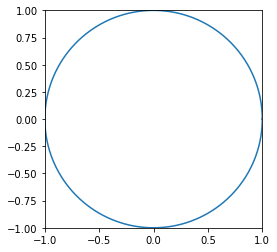

In [2]:
#make x and y coordinates for a circle of radius r
r = 1.0
thetas = np.linspace(0,2*np.pi,1000)
x = 1.0 * np.cos(thetas)
y = 1.0 * np.sin(thetas)

#plot the coordinates on a square axis
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.plot(x,y)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.0)
plt.show()

The trick is that if we want to know the area of the circle, we can estimate it by the ratio of the area that is *within* the circle to the total area we are encompassing, which we know.  If we have a series of random points that are evenly distributed within the square above, then we can estimate the area of the circle relative to the total area of the box by finding the ratio of the number of random points that fall within the square to the total number in the box.  That is, we can write:

$\frac{A_{circle}}{A_{box}} = \frac{k}{N}$


where $k$ is the number of random points within the circle and $N$ is the number of points within the box.  Note that in this case we are assuming the $N$ random number are equally distributed within the box, that is, their x and y values fall evenly within the range of -1 to 1. 

For a unit circle, this gives us an easy way to estimate $\pi$.  Since we know that $A_{box}=4.0$, we can rearrange the above to get:

$A_{circle}= \pi r^2 = A_{box} \frac{k}{N} = \frac{4k}{N}=\pi$

**Activity** The code below calculates $\pi$ using the above procedure.  In particular it takes these steps:

1.  The user defines the number of random points to sample.

2.  For each sample, a random $x$ and $y$ coordinate is computed.  Note that the random numbers from numpy are on the range of 0 to 1, so they must be rescaled to be on the range of -1 to 1 to fill our box.  To do that, we use the following code:

 ```xrand = 2*np.random.random() - 1.0```
 Be sure you see why this code creates random number from -1 to 1!

3.  For each random $x$ and $y$ pair, test if it is inside the circle.  Keep track of the number of points that are within the circle. 

4.  At the end, take the ratio of the number of points within the circle and the total number of points and multiply by 4.  This is your estimate of $\pi$.


Note that there is some extra code below that is used for plotting the points.  This is meant to keep track of the random points that are within the circle and those that are outside of it, and to color them at the end for visualization purposes.  

Run the code with different values of $N$.  You may want to try values of $N$ such as 5, 10, 50, 100, 1000, etc.  Answer the following questions:

1.  How reproducible  is your estimate of $\pi$ for small values of $N$?  How about for a large value of $N$?  You may want to run your code multiple times to test this.

2. How large of a value of $N$ do you need to reliably estimate $\pi$ to two decimal places?    

In [31]:
import numpy as np
import matplotlib.pyplot as plt

Number of random points to use:

In [41]:
N = 1000

Setup lists that will be used for storing the points inside and outside of the circle

In [42]:
x_within = ([])
y_within = ([])
x_out = ([])
y_out = ([])

For each of the $N$ samples, generate random $x$ and $y$ coordinates and test if they are within the circle.  If so, add one to our count of the number of points in the circle, ```N_within```.  Otherwise, proceed to the next sample.  For each case also keep track of the points for plotting later.

In [43]:
N_within = 0
for i in range(N):
  xrand = 2*np.random.random() - 1.0
  yrand = 2*np.random.random() - 1.0
  if (xrand**2+yrand**2) <r:
    N_within += 1
    x_within.append(xrand)
    y_within.append(yrand)
  else:
    x_out.append(xrand)
    y_out.append(yrand)

Plot the results along with the unit circle.  Also use the ratio of points within the circle to the total number of points to estimate $\pi$.

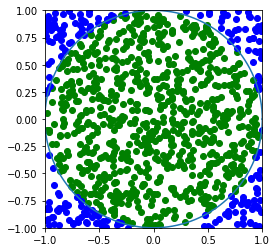

For N= 1000 random points, the estimate of pi is: 3.148


In [44]:
#make x and y coordinates for a circle of radius r
r = 1.0
thetas = np.linspace(0,2*np.pi,1000)
x = 1.0 * np.cos(thetas)
y = 1.0 * np.sin(thetas)

#plot the coordinates on a square axis
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

plt.plot(x,y)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.0)

#make a scatter plot of the points sampled if N is relatively small
if N<10000:
  plt.scatter(x_within,y_within, color='green')
  plt.scatter(x_out,y_out,color='blue')

plt.show()

print("For N=", N, "random points, the estimate of pi is:", 4*N_within/N)

## Mean value method

The above "hit or miss" method will work, but its not the most efficient, even among Monte Carlo methods.  A more efficient method is the "mean value method."  To see where that comes from, consider the estimation of an integral for the function of $f\left(x\right)$ from $a$ to $b$:

$I = \int_a^b f\left(x\right) dx$

By definition, the average value of $f\left(x\right)$ over this range is:

$\left<f\right> = \frac{1}{b-a} \int_a^b f\left(x\right) dx $

Putting these together we get:

$I = \left(b-a\right)  \left<f\right>$

Using random numbers, we can estimate the value of $\left<f\right>$ average $f\left(x\right)$ at a series of $N$ randomly chosen points.  That is:

$\left<f\right> \approx \frac{1}{N} \sum_{x_i}^N f\left(x_i\right)$

Putting these together, we get:

$I \approx \frac{b-a}{N}\sum_{x_i}^N f\left(x_i\right)$.

A key point is that the random numbers that are used to sampled $f\left(x\right)$ must be uniformly  distributed over the integration range from $a$ to $b$.  So if you are using the python random number generator, you may need to rescale them to fit that range.

**Activity:** The code below takes an alternative route to calculate $\pi$.  Consider calculating only 1/4 of the area of a circle, the part in the 1st quadrant.  We can do that with an integral by:

$\frac{1}{4}A_{circle} = \int_0^1 \sqrt{1-x^2}dx$

We can then estimate $\pi$ by: 

$\pi = 4 \int_0^1 \sqrt{1-x^2}dx$

using the mean-value method, this gives us an estimate of $\pi$ as:

$\pi \approx 4 \frac{1-0}{N}\sum_{x_i}^N \sqrt{1-x_i^2}=\frac{4}{N}\sum_{x_i}^N \sqrt{1-x_i^2}$

The code below implements that procedure for $N$ randomly  selected datapoints.  As before, repeat it multiple times for different values of $N$.  How many random numbers do you need to compute $\pi$ to two decimal places? 




In [8]:
import numpy as np

Number of random points to use:

In [9]:
N = 1000000

Setup lists that will be used for storing the points inside and outside of the circle

In [10]:
def f(x):
  return np.sqrt(1.0-x**2)

For each of the $N$ samples, generate a random $x$  coordinate  and evaluate the functions at that point.  At the end, take the average of these values and multiply by 4 to get the estimate of $\pi$.

In [11]:
f_sum = 0.0
for i in range(N):
  xrand = np.random.random()
  f_sum += f(xrand)
print("For N=", N, "random points, the esimate of pi is:", 4*f_sum/N)

For N= 1000000 random points, the esimate of pi is: 3.1404523753472904


## Activity

While estimating $\pi$ is always fun, the above integrals can be done quicker with methods such as the trapezoidal and Guassian quadrature methods.  Consider the integral below, which is more difficult:

$I = \int_{-2}^6 \sin^2\left( \frac{1}{x\cdot(2-x)}\right) dx $

1.  Plot the function over the range from $-2\leq x \leq 6$.  Can you guess why methods such as Gaussian  quadrature or the trapezoidal rule might have problems with this integral? Discuss it with your breakout room.

2.  Evaluate this integral with the "hit or miss" method.  Be careful with the range of your random numbers. 

3.  Evaluate this integral with the mean field method.  Again, be careful with the range of your random numbers.

Note that when I performed this integral with $N = 10^9$ on my local computer, I got a value of 2.4338

In [20]:
import numpy as np

In [21]:
N = 10000

In [22]:
def f(x):
  return np.sin(1.0/(x*(2-x)))**2

First plot the function.  Note its complex behavior near $x=0$ and $x=2$.  The trapezoidal or Gaussian quadrature methods will have a hard time in these regions since the functions changes so quickly.

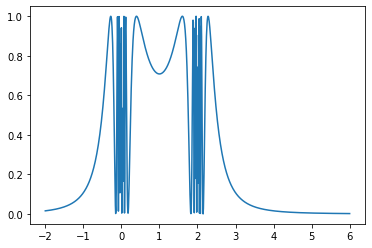

In [45]:
x= np.linspace(-2.0,6.0,1000)
plt.plot(x,f(x))
plt.show()

Perform the "hit or miss" method:

In [46]:
N_hit = 0
A = 8.0
for i in range(N):
  xrand = np.random.random() * 8 - 2.0
  yrand = np.random.random() 
  if yrand < f(xrand):
    N_hit += 1
print("The estimate of the integral for N=", N, "points with the hit or miss method is=", A*N_hit/N)

The estimate of the integral for N= 1000 points with the hit or miss method is= 2.392


Perform the mean value method:

In [53]:
f_sum = 0.0
A = 8.0
for i in range(N):
  xrand = np.random.random() *8 - 2.0
  f_sum += f(xrand)
print("The estimate of the integral for N=", N, "points with mean field method is=", A*f_sum/N)

The estimate of the integral for N= 1000 points with mean field method is= 2.266160051590515


You can also try this with the trapezoidal  method for comparison:

In [28]:
x= np.linspace(-2.0,6.0,N)
y=f(x)
h = x[1]-x[0]
integrand = h*(np.sum(y)-0.5*(y[0]+y[-1]))
print(integrand)

2.446823817573083


#Integrals in higher dimensions

We've shown that Monte Carlo integration works, but for many 1D integrals we have already developed well-defined methods for estimating their values.  So why do we care about Monte Carlo integration?  It turns out that Monte Carlo integration is typically much better when we go to higher dimensions.  To see why, consider the number of points we would need for the trapezoidal rule.  If we need $1000$ points in 1D for the trapezoidal rule to converge to an acceptable solution, we'll need $1000x1000$ points in 2D, $1000^3$ points in 3D, and for an N-dimensional integral we'll need $1000^N$ total points.  That can quickly become unfeasible!  It turns out that as we increase dimensions, we don't need to increase the number of points in our Monte Carlo calculations by nearly as much.  So be random sampling, we can converge to a solution for multi-dimensional integrals much faster. 

The formula above for the mean value method easily extends to multiple dimensions.  If we have a multidimensional integral to estimate of the form:

$I = \int_V f\left(x\right) dv$

Then, following the same steps as above, we can estimate its value by:

$I \approx \frac{V}{N}\sum_{r_i}^N f\left(r_i\right)$.

Where $r_i$ is a point in our multidimensional space (for example, in 3D $r$ would have a random $x$, $y$, and $z$ component).

**Activity** The formula for the integral of a Gaussian (or normal) distribution in 2D is:

$I = \int_{-\infty}^{\infty} e^{-r^2}dr= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-(x^2+y^2)}$ dx dy

Where for two dimensions $r^2 = x^2 + y^2$. The analytic solution for the integral of a Gaussian in $d$ dimensions is known to be:

$I = \int_{-\infty}^{\infty} e^{-r^2}dr = \pi^{d/2}$

Modify the mean value code above to calculate this integral in two dimensions.  A few hints:

1.  We can't integrate to infinity, so you'll have to truncate your integration at a maximum and minimum value.  I suggest integration $x$ and $y$ from -5 to 5, although you could certainly try other values.  This might seem like a small number compared to infinity, but since this will cutoff the Gaussian at values of $e^{-25}\approx 1.4\cdot 10^{-11}$, its not too bad.

2.  You'll need to generate two random numbers per step, one for the $x$ value and one for $y$.

3. The volume of your integration space will be dependent on your choice of a cutoff that you chose above.

4. If you have time, try to extend this to three or higher dimensions.  Do you get the expected results?  Why or why not?


In [19]:
import numpy as np

N=10000

f_sum = 0.0
maxval = 5.0
A = (2*maxval)**2

for i in range(N):
  xrand = np.random.random() * maxval * 2 - maxval
  yrand = np.random.random() * maxval * 2 - maxval
  f_sum += np.exp(-(xrand**2+yrand**2))
print("The estimate of the integral for N=", N, "points with mean field method is=", A*f_sum/N)

The estimate of the integral for N= 10000 points with mean field method is= 3.0396761033964808
